<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section6_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 6: Introducción a las Series de Tiempo con StatsModels y Scikit-Learn

# 6.1. Series de Tiempo - Conceptos Básicos

Los datos obtenidos a partir de observaciones recogidas a lo largo del tiempo son extremadamente comunes. En los negocios, observamos las tasas de interés de la semana, los precios de cierre de las acciones diarios, los índices de precios mensuales, las cifras de ventas anuales y así sucesivamente.

Una serie es una secuencia de datos que se registran en intervalos de tiempo. Cada dato de la serie está asociado a un punto específico en el tiempo y a partir de ésta información se puede analizar la evolución y cambio de los datos a través del tiempo. Las series de tiempo tienen diversas aplicaciones en economía, climatología, etc.

# 6.1.1. Componentes de una serie de tiempo

1. **Tendencia:** La tendencia es la dirección general en la cuál se mueven los datos a lo largo del tiempo.

2. **Componente estacional:** Son fluctuaciones que ocurren de manera recurrente en ciertos intervalos de tiempo. Usualmente está asociado a eventos que ocurren cada cierto tiempo.

3. **Componente cíclico:** Son fluctuaciones que ocurren a mayor intervalo de tiempo que los estacionarios, y pueden no tener un patrón fijo. Usualmente asociados a factores económicos, por ejemplo recesiones.

4. **Componente aleatorio o de error:** Es una componente que usualmente está asociada a errores en la medida o eventos que no pueden ser explicados por los componentes anteriores. Ejemplo: Desastres naturales, errores al tomar los datos.

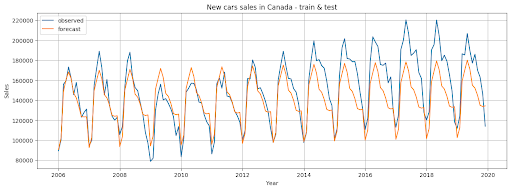

# 6.2. Implementación de series de tiempo en Python

# 6.2.1. Librería datetime

In [ ]:
from datetime import datetime

datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

# 6.2.2. Librería dateutil

In [ ]:
from dateutil import parser

string_date = "July 4 of 2015"
date = parser.parse(string_date)
date

datetime.datetime(2015, 7, 4, 0, 0)

# 6.2.3. Librería numpy

Numpy también permite manejar fechas de una manera sencilla dentro de sus arreglos. Una de las funcionalidades útiles es permitir la operación de números y fechas.

In [ ]:
import numpy as np

date = np.array(["2015-07-04"], dtype=np.datetime64)
date

array(['2015-07-04'], dtype='datetime64[D]')

In [ ]:
numbers = np.arange(12)
numbers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
date = np.datetime64("2015-07-04")
new_date = date + np.timedelta64(1, "3D")
new_date

numpy.datetime64('2015-07-07')

# Librería Pandas

In [ ]:
import pandas as pd

pd.to_datetime("2015-07-04 3 pm")

Timestamp('2015-07-04 15:00:00')

# Función date_range()
La función date_range sirve para generar un rango de fechas en un intervalo. Se puede especificar la frecuencia con la cuál se quieren generar los datos en días, días hábiles, meses, años, etc.

In [ ]:
dates = pd.date_range(start="2018-03-01", end="2018-04-01", freq="D")
dates

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
dates = pd.date_range(start="2018-03-01", periods=32, freq="W-MON")
dates

DatetimeIndex(['2018-03-05', '2018-03-12', '2018-03-19', '2018-03-26',
               '2018-04-02', '2018-04-09', '2018-04-16', '2018-04-23',
               '2018-04-30', '2018-05-07', '2018-05-14', '2018-05-21',
               '2018-05-28', '2018-06-04', '2018-06-11', '2018-06-18',
               '2018-06-25', '2018-07-02', '2018-07-09', '2018-07-16',
               '2018-07-23', '2018-07-30', '2018-08-06', '2018-08-13',
               '2018-08-20', '2018-08-27', '2018-09-03', '2018-09-10',
               '2018-09-17', '2018-09-24', '2018-10-01', '2018-10-08'],
              dtype='datetime64[ns]', freq='W-MON')

# Ejemplo Práctico:
Construir un rango de fechas entre 2018-03-05 y 2023-04-03 de mes en mes

In [ ]:
dates = pd.date_range(start="2018-03-05", end="2023-04-03", freq="D")
dates

DatetimeIndex(['2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14',
               ...
               '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01',
               '2023-04-02', '2023-04-03'],
              dtype='datetime64[ns]', length=1856, freq='D')

También podemos especificar en vez de un rango final, un número de periodos (o de elementos) según la frecuencia:

In [ ]:
dates = pd.date_range(start="2018-03-05", periods=1856, freq="D")
dates

DatetimeIndex(['2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14',
               ...
               '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01',
               '2023-04-02', '2023-04-03'],
              dtype='datetime64[ns]', length=1856, freq='D')

# 6.2.4. Series de tiempo con pd.Series o pd.DataFrame

Generalmente se representan por medio de DataFrames o Series de Pandas, en donde el índice es la variable temporal de tipo datetime. Ésto convierte el índice en un objeto de tipo DatetimeIndex, que permite hacer operaciones adicionales sobre los datos. Para leer un csv e indexarlo por medio de una fecha usamos el parámetro parse_dates: esto convierte el tipo de dato de string a datetime, para luego usar index_col para seleccionarlo como índice.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = pd.read_csv("stocks20162018.csv", index_col="Date")
stocks

Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  77.76  79.35  77.24  79.11   3117200   MMM
2006-01-04  79.49  79.49  78.25  78.71   2558000   MMM
2006-01-05  78.41  78.65  77.56  77.99   2529500   MMM
2006-01-06  78.64  78.90  77.64  78.63   2479500   MMM
2006-01-09  78.50  79.83  78.46  79.02   1845600   MMM
...           ...    ...    ...    ...       ...   ...
2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA
2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA
2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA
2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA
2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA

[93612 rows x 6 columns]

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [ ]:
stocks = pd.read_csv("stocks20162018.csv", parse_dates=["Date"], index_col="Date")
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


# 6.2.4.1. Transformar un campo de string a datetime usando pd.to_datetime()
También podemos transformar la columna usando la función pd.to_datetime():

In [ ]:
stocks = pd.read_csv("stocks20162018.csv")
stocks["Date"] = pd.to_datetime(stocks["Date"])
stocks = stocks.set_index("Date")
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


# 6.2.4.2. Acceder a subconjuntos de fechas usando la función loc() y sort_index()
Al tener los índices como datatime, podemos usar la función loc para filtrar por fechas o rangos de fecha específico. Para ésto, es necesario ordenar la serie con la función sort_index()

In [ ]:
stocks = stocks.sort_index()
stocks.loc["2006-01": "2006-02"]

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  77.76  79.35  77.24  79.11    3117200   MMM
2006-01-03  39.83  40.36  39.30  40.19   12839400   JPM
2006-01-03  61.07  61.85  61.05  61.63   10703200   JNJ
2006-01-03  24.08  24.48  24.00  24.40    9657400   DIS
2006-01-03  44.85  46.00  44.52  45.99    3843800   TRV
...           ...    ...    ...    ...        ...   ...
2006-02-28  57.81  57.92  57.42  57.65    8942200   JNJ
2006-02-28  58.70  59.15  58.19  58.50    3531800   UTX
2006-02-28  45.57  45.81  45.22  45.36   12302300   WMT
2006-02-28  19.96  20.40  19.86  20.24  137102013  CSCO
2006-02-28  34.14  34.49  33.70  33.70   10824900    VZ

[1209 rows x 6 columns]

# 6.2.4.3. Truncar valores con truncate()
Podemos truncar valores de la serie usando la función truncate, y como parámetro after la fecha desde la cuál queremos truncar los datos

In [ ]:
truncated_stocks = stocks.truncate(after="2009")
truncated_stocks

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  77.76  79.35  77.24  79.11    3117200   MMM
2006-01-03  39.83  40.36  39.30  40.19   12839400   JPM
2006-01-03  61.07  61.85  61.05  61.63   10703200   JNJ
2006-01-03  24.08  24.48  24.00  24.40    9657400   DIS
2006-01-03  44.85  46.00  44.52  45.99    3843800   TRV
...           ...    ...    ...    ...        ...   ...
2008-12-31  83.50  85.00  83.50  84.16    6667617   IBM
2008-12-31  11.95  12.30  11.92  12.20    9090875  AABA
2008-12-31  59.18  60.05  59.07  59.83   11920587   JNJ
2008-12-31  50.74  51.69  49.91  51.28    7792434  AMZN
2008-12-31  12.28  12.53  12.19  12.19  152010341  AAPL

[23405 rows x 6 columns]

# 6.2.4.4. Graficar una serie de tiempo en Python usando plot()

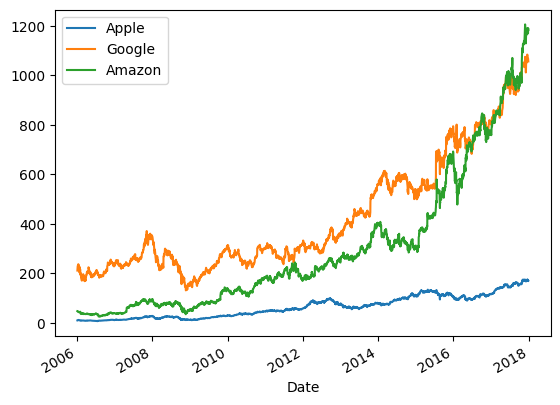

In [ ]:
stocks.query('Name == "AAPL"').Open.plot()
stocks.query('Name == "GOOGL"').Open.plot()
stocks.query('Name == "AMZN"').Open.plot()

plt.legend(["Apple", "Google", "Amazon"])
plt.show()

# 6.2.4.5. Cambiando los intervalos de datos según una función de agregación con la función resample() y apply()
Podemos agrupar los datos por intervalos de tiempo y reemplazar esos valores con una función de agregación. Podemos por ejemplo calcular la media trimestral de las acciones

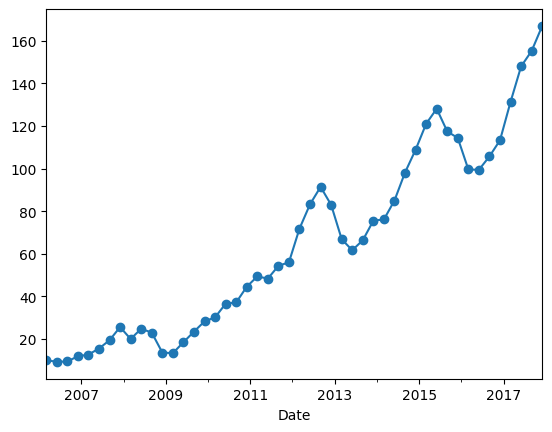

In [ ]:
apple_stocks = stocks[stocks["Name"] == "AAPL"]
trimester_stocks = apple_stocks["Open"].resample("3M", kind="period").apply("mean")
trimester_stocks.plot(marker="o")
plt.show()

# Ejemplo Práctico:
Utilizando el dataset de acciones, analice las 5 acciones que peor abrieron a 2018.

In [ ]:
stocks = pd.read_csv("stocks20162018.csv", parse_dates=["Date"])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93612 non-null  datetime64[ns]
 1   Open    93587 non-null  float64       
 2   High    93602 non-null  float64       
 3   Low     93592 non-null  float64       
 4   Close   93612 non-null  float64       
 5   Volume  93612 non-null  int64         
 6   Name    93612 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [ ]:
last_date = stocks.Date == stocks.Date.max()
worst_stocks = stocks[last_date].sort_values("Open").head(5)
worst_stocks

Date   Open   High    Low  Close    Volume  Name
33217 2017-12-29  17.27  17.53  17.27  17.45  76149513    GE
66434 2017-12-29  36.23  36.49  36.22  36.22  11421487   PFE
21137 2017-12-29  38.41  38.62  38.30  38.30  12583621  CSCO
24157 2017-12-29  45.70  46.18  45.69  45.88   8371536    KO
45296 2017-12-29  46.21  46.49  46.09  46.16  17394491  INTC

In [ ]:
worst_tickers = worst_stocks.Name.values
worst_tickers

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [ ]:
stocks_copy = stocks.copy()
stocks_copy = stocks_copy.set_index("Date")
stocks_copy

Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  77.76  79.35  77.24  79.11   3117200   MMM
2006-01-04  79.49  79.49  78.25  78.71   2558000   MMM
2006-01-05  78.41  78.65  77.56  77.99   2529500   MMM
2006-01-06  78.64  78.90  77.64  78.63   2479500   MMM
2006-01-09  78.50  79.83  78.46  79.02   1845600   MMM
...           ...    ...    ...    ...       ...   ...
2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA
2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA
2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA
2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA
2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA

[93612 rows x 6 columns]

In [ ]:
is_worst = stocks_copy.Name.isin(worst_tickers)
worst_stocks = stocks_copy.loc[is_worst].groupby("Name")
worst_stocks

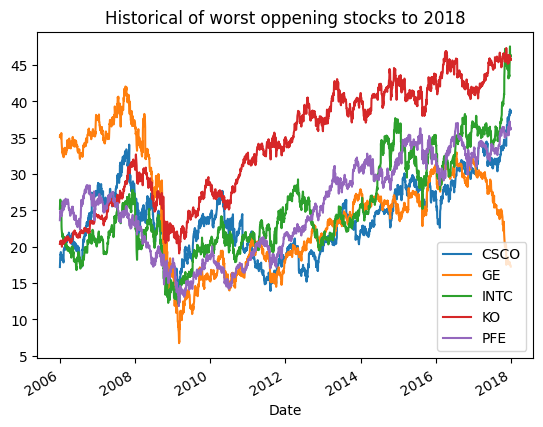

In [ ]:
worst_stocks.Open.plot(title="Historical of worst oppening stocks to 2018", legend=True)
plt.show()

# Ejercicio Práctico (10 min):
Utilizando el dataset de acciones, analice las 5 acciones que mejor abrieron a 2018.

In [ ]:
last_date = stocks.Date == stocks.Date.max()
best_stocks = stocks[last_date].sort_values("Open", ascending=False).head(5)
best_stocks

Date     Open     High      Low    Close   Volume   Name
90592 2017-12-29  1182.35  1184.00  1167.50  1169.47  2688391   AMZN
87573 2017-12-29  1055.49  1058.05  1052.70  1053.40  1180340  GOOGL
12078 2017-12-29   296.94   297.30   294.83   294.91  1824591     BA
36237 2017-12-29   255.87   256.65   252.91   254.76  2519253     GS
3019  2017-12-29   236.48   237.31   235.37   235.37  1343878    MMM

In [ ]:
best_tickers = best_stocks.Name.values
best_tickers

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

In [ ]:
is_best = stocks_copy.Name.isin(best_tickers)
best_stocks = stocks_copy.loc[is_best].groupby("Name")
best_stocks

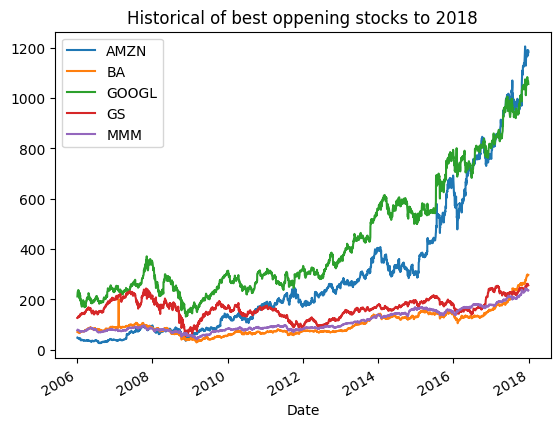

In [ ]:
best_stocks.Open.plot(title="Historical of best oppening stocks to 2018", legend=True)
plt.show()

# 6.2.4.6. Promedio Móvil Simple con la función rolling()

El promedio móvil se utiliza para suavizar la curva y el conjunto de datos, y para resaltar las tendencias a lo largo del tiempo. Consiste en, dada una ventana de tiempo (i.e. 3 días) tomar el promedio de los datos anteriores en cada paso.

              Open    Open SMA
Date                          
2006-01-03   10.34         NaN
2006-01-04   10.73         NaN
2006-01-05   10.69         NaN
2006-01-06   10.75         NaN
2006-01-09   10.96         NaN
...            ...         ...
2017-12-22  174.68  163.991333
2017-12-26  170.80  164.105556
2017-12-27  170.10  164.241556
2017-12-28  171.00  164.391556
2017-12-29  170.52  164.528111

[3019 rows x 2 columns]


<ipython-input-73-1f842e44b1b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applestocks_opening["Open SMA"] = applestocks_opening.Open.rolling(window=90).mean()


<Figure size 640x480 with 0 Axes>

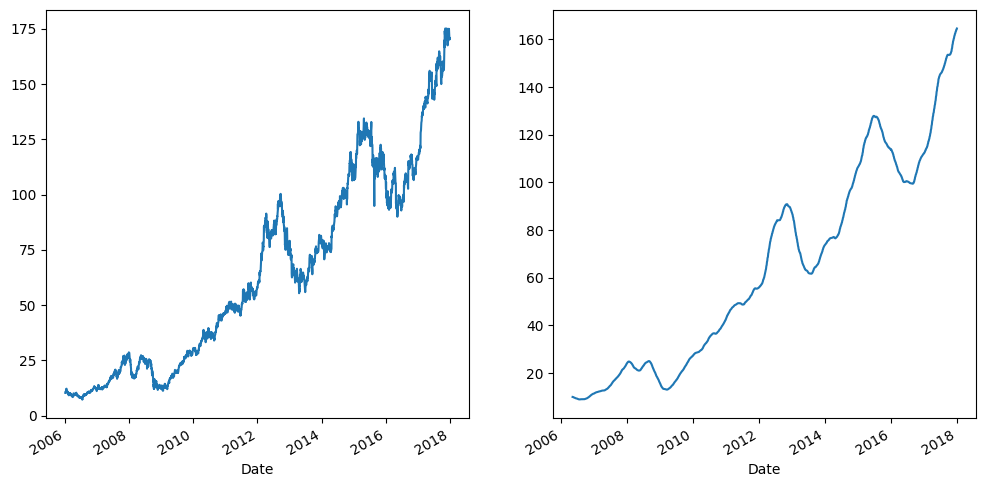

In [ ]:
stocks = pd.read_csv("stocks20162018.csv", parse_dates=["Date"], index_col="Date")

applestocks = stocks.query('Name == "AAPL"')
applestocks_opening = applestocks[["Open"]]
applestocks_opening["Open SMA"] = applestocks_opening.Open.rolling(window=90).mean()
print(applestocks_opening)

plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
applestocks_opening.Open.plot(ax=axes[0])
applestocks_opening["Open SMA"].plot(ax=axes[1])
plt.show()

# 6.3. Componentes de una serie de tiempo y series estacionarias

# 6.3.1. Identificar los componentes de una serie de tiempo con la función seasonal_decompose()
Usando StatsModels podemos identificar los componentes de una serie de tiempo llamando la función seasonal_decompose().

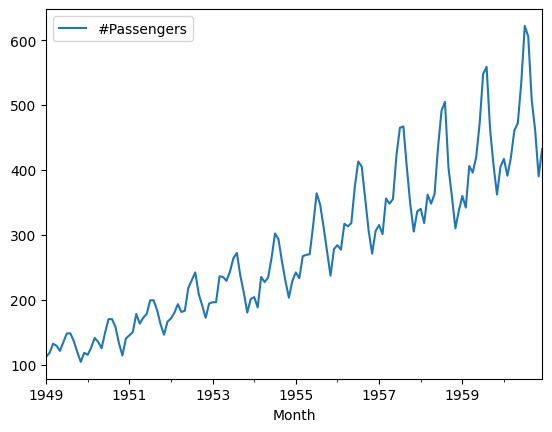

In [ ]:
passengers = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month")
passengers.plot()
plt.show()

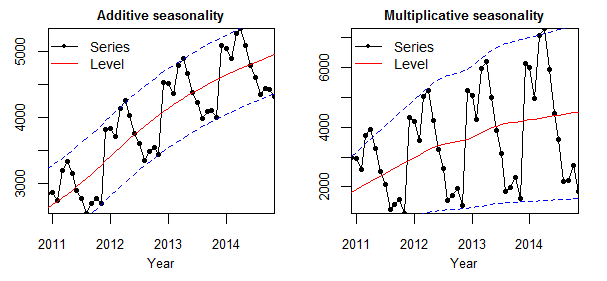

<Figure size 1200x1000 with 0 Axes>

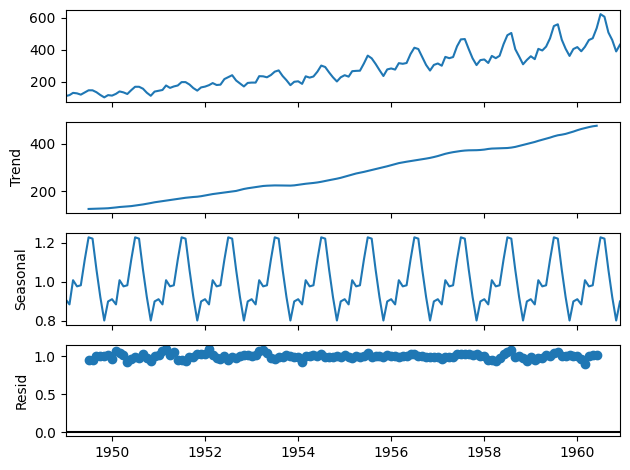

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(12, 10))
result = seasonal_decompose(passengers, model="multiplicative")
result.plot()
plt.show()

In [ ]:
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# 6.3.2 Series estacionarias y como obtenerlas a partir de una no-estacionaria

Una serie estacionaria es una serie que no presenta tendencias ni patrones de crecimiento o decrecimiento. Muchos de los modelos de pronóstico de series de tiempo, requieren que la serie de tiempo sea estacionaria, por lo que es importante saber identificar.

Hay varias formas de transformar una serie no-estacionaria a estacionaria, en particular, exploraremos una usando regresiones lineales. El proceso es el siguiente:

1. Construir una regresión lineal a partir de los datos, ésta regresión será muy aproximada a la curva de tendencia de la serie de tiempo.
2. Restar a cada punto de la tendencia el punto correspondiente a la regresión.
3. El resultado debería ser una serie de tiempo más estacionaria.

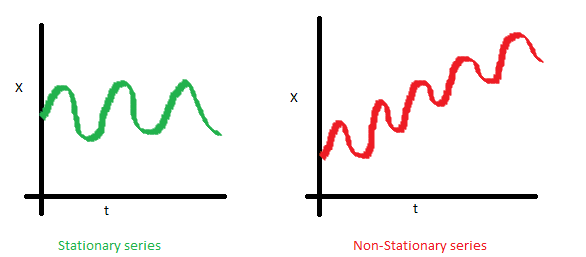

In [ ]:
from sklearn.linear_model import LinearRegression

passengers = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month")
passengers

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [ ]:
import numpy as np

x = np.array([i for i in range(0, len(passengers))]).reshape(-1 , 1)
y = passengers["#Passengers"].to_numpy()

reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
y_pred

array([ 90.30996169,  92.96714559,  95.6243295 ,  98.28151341,
       100.93869732, 103.59588123, 106.25306513, 108.91024904,
       111.56743295, 114.22461686, 116.88180077, 119.53898467,
       122.19616858, 124.85335249, 127.5105364 , 130.16772031,
       132.82490421, 135.48208812, 138.13927203, 140.79645594,
       143.45363985, 146.11082375, 148.76800766, 151.42519157,
       154.08237548, 156.73955939, 159.3967433 , 162.0539272 ,
       164.71111111, 167.36829502, 170.02547893, 172.68266284,
       175.33984674, 177.99703065, 180.65421456, 183.31139847,
       185.96858238, 188.62576628, 191.28295019, 193.9401341 ,
       196.59731801, 199.25450192, 201.91168582, 204.56886973,
       207.22605364, 209.88323755, 212.54042146, 215.19760536,
       217.85478927, 220.51197318, 223.16915709, 225.826341  ,
       228.4835249 , 231.14070881, 233.79789272, 236.45507663,
       239.11226054, 241.76944444, 244.42662835, 247.08381226,
       249.74099617, 252.39818008, 255.05536398, 257.71

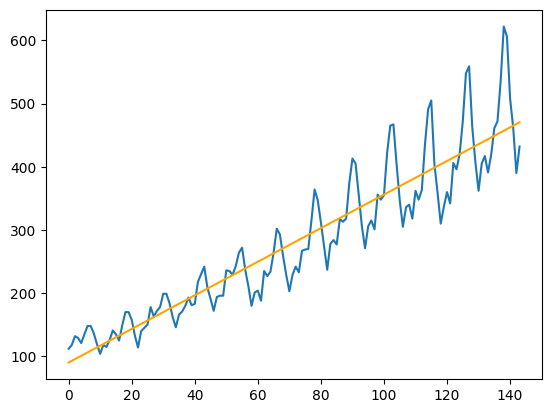

In [ ]:
plt.plot(y)
plt.plot(y_pred, color="orange")
plt.show()

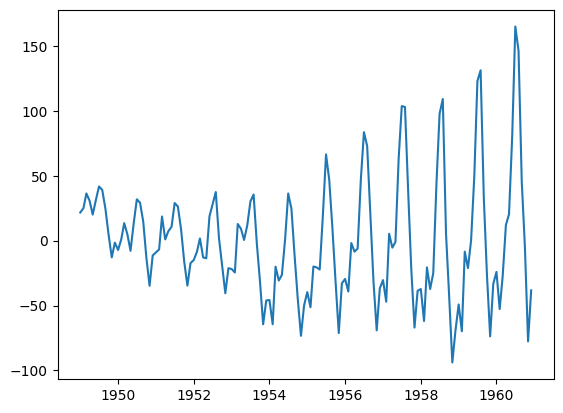

In [ ]:
detrended = pd.Series(y - y_pred).to_frame()
detrended = detrended.set_index(passengers.index)
plt.plot(detrended)
plt.show()

# Transformar una serie a estacionaria usando la función diff()

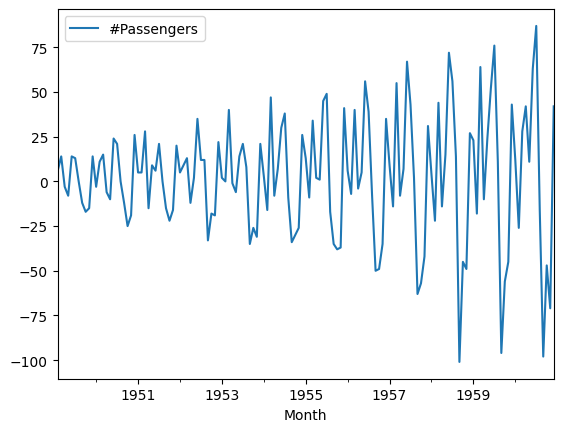

In [ ]:
passengers_diff = passengers.diff().dropna()
passengers_diff.plot()
plt.show()

# 6.5. Forecasts o Pronósticos con StatsModels
El objetivo último de un modelo es predecir, veamos entonces cómo podemos usar algunos modelos de predicción para series de tiempo con StatsModels.

# 6.5.1. Suavizado Exponencial Simple

Es un método comunmente usado para series de tiempo que no tienen tendencia ni estacionalidad, en el cuál se tienen en cuenta todas las observaciones, pero dando más relevancia a las observaciones más recientes. Se hace por medio de un parámetro alpha (α) que va entre 0 y 1. Si α se aproxima a cero, los términos decaen más lentamente, lo que quiere decir que estamos considerando en más medida las observaciones más antiguas. Si por el contrario α se va acercando a 1, los términos decaen más rápido y los pesos de las observaciones más antiguas van a tender a cero. La componente exponencial se genera por las multiplicaciones sucesivas entre α y (1 - α).

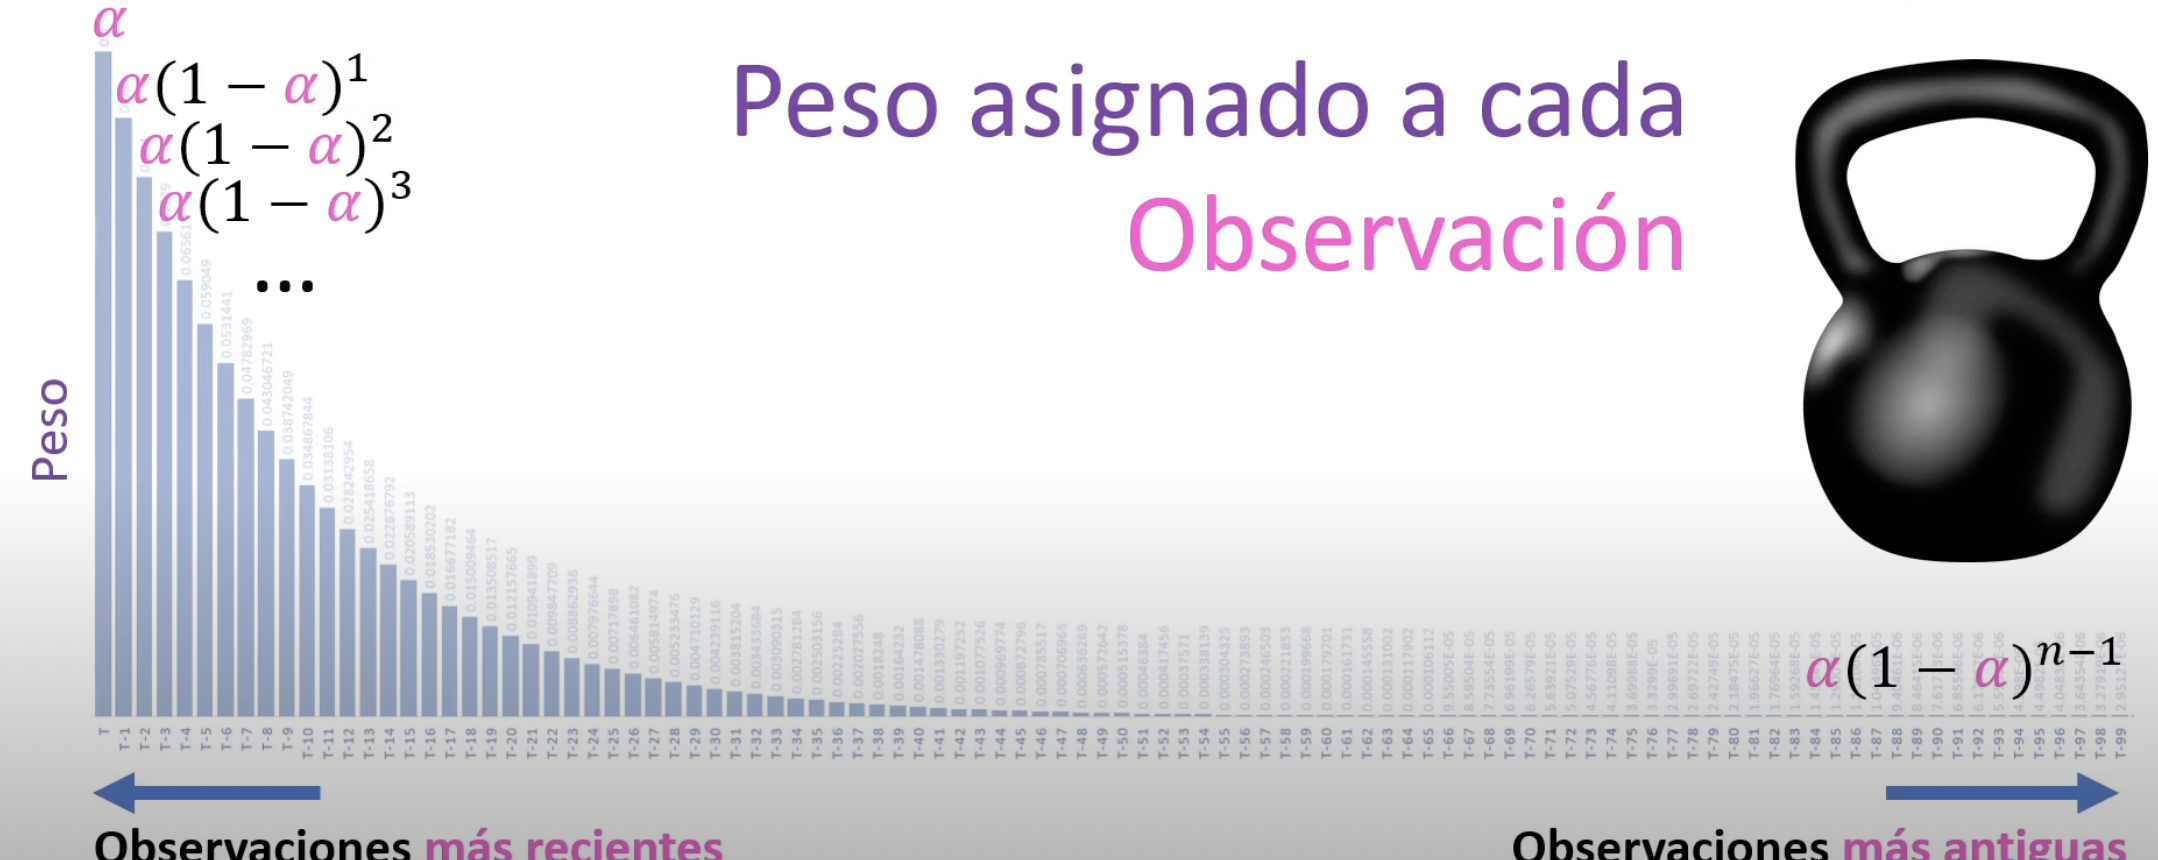

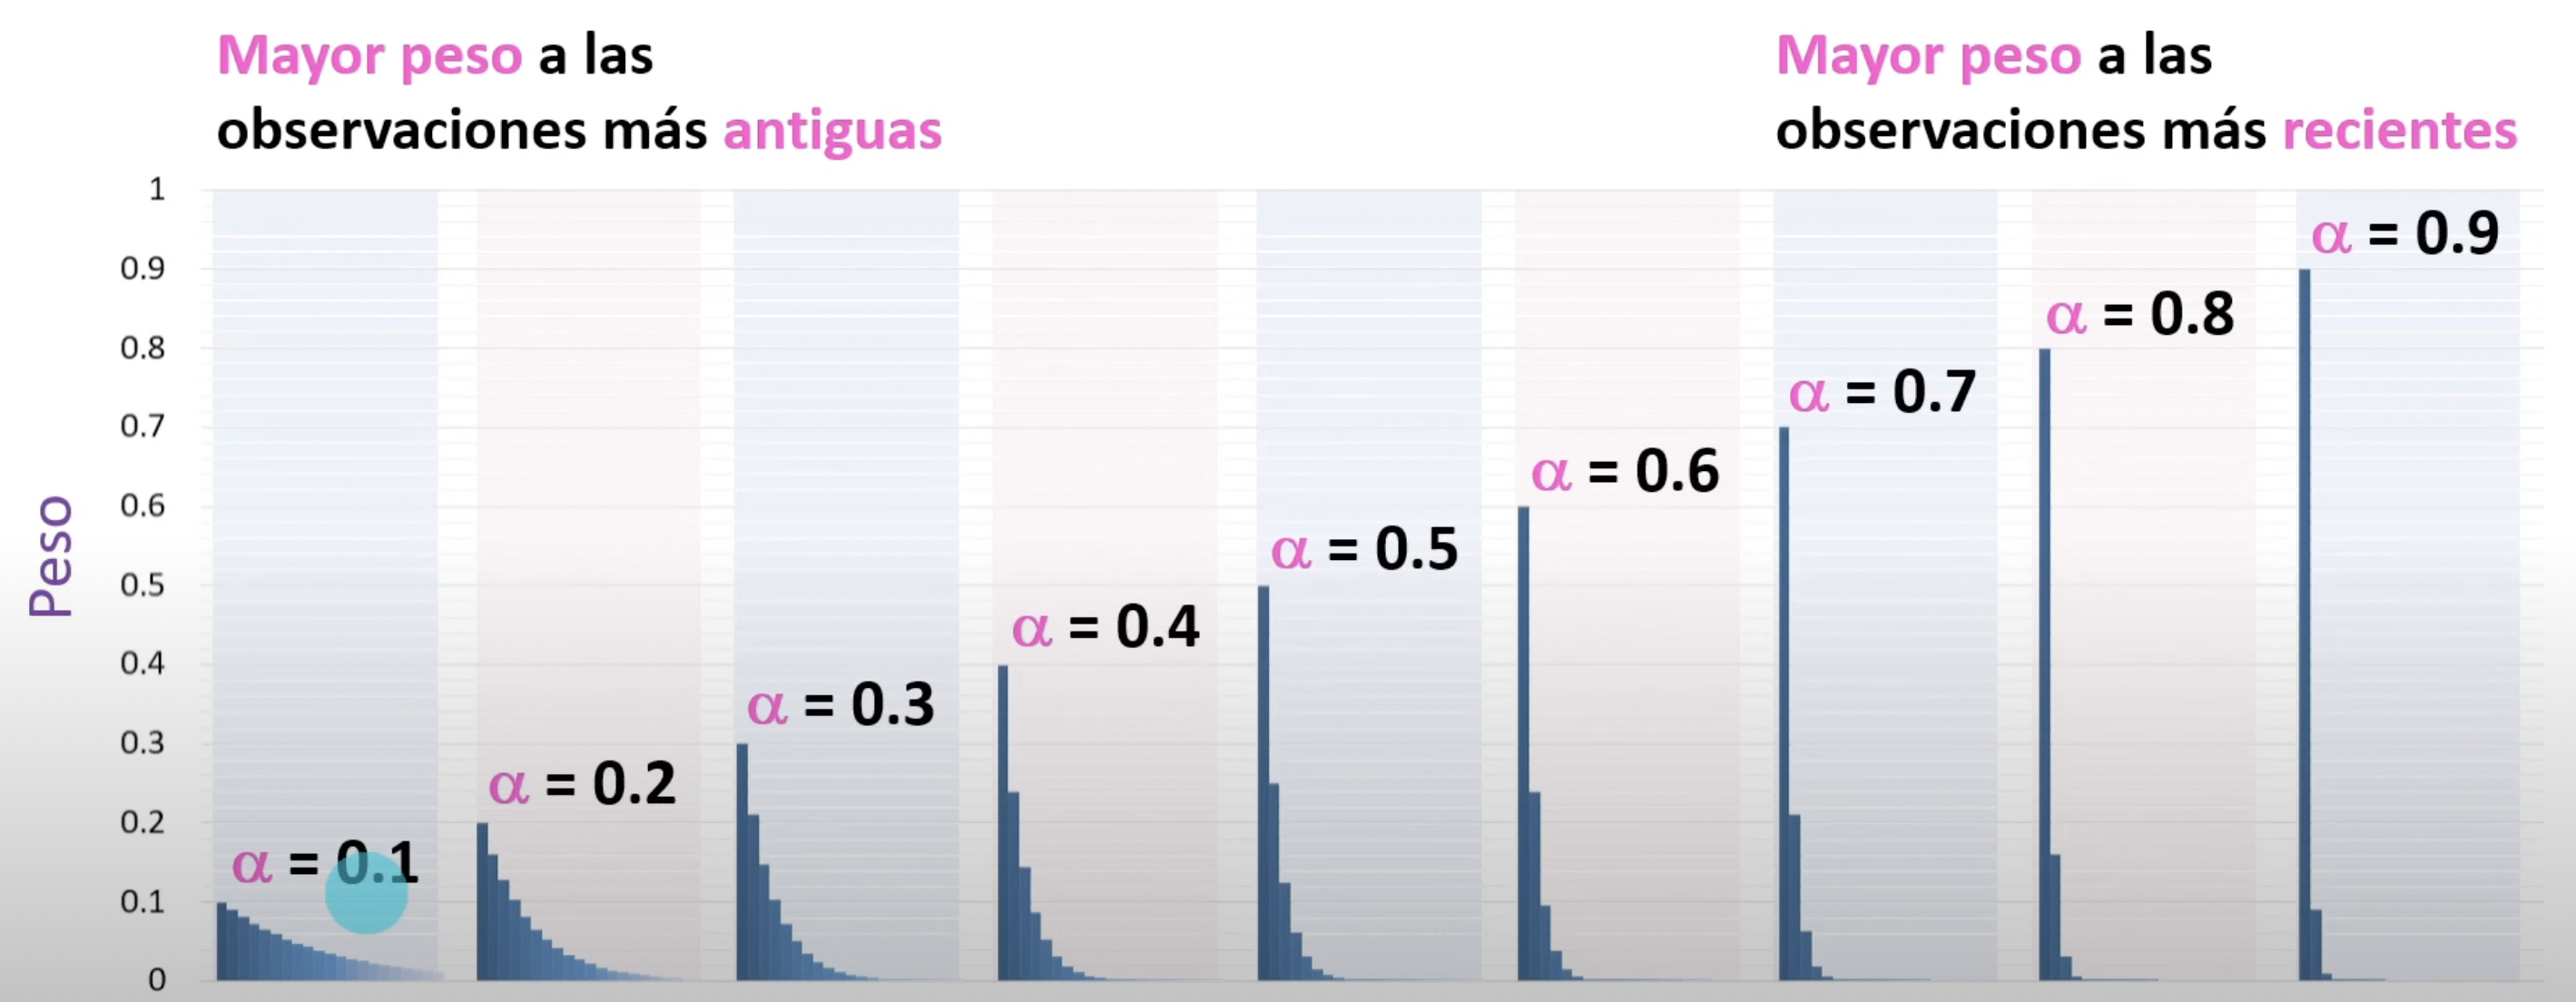

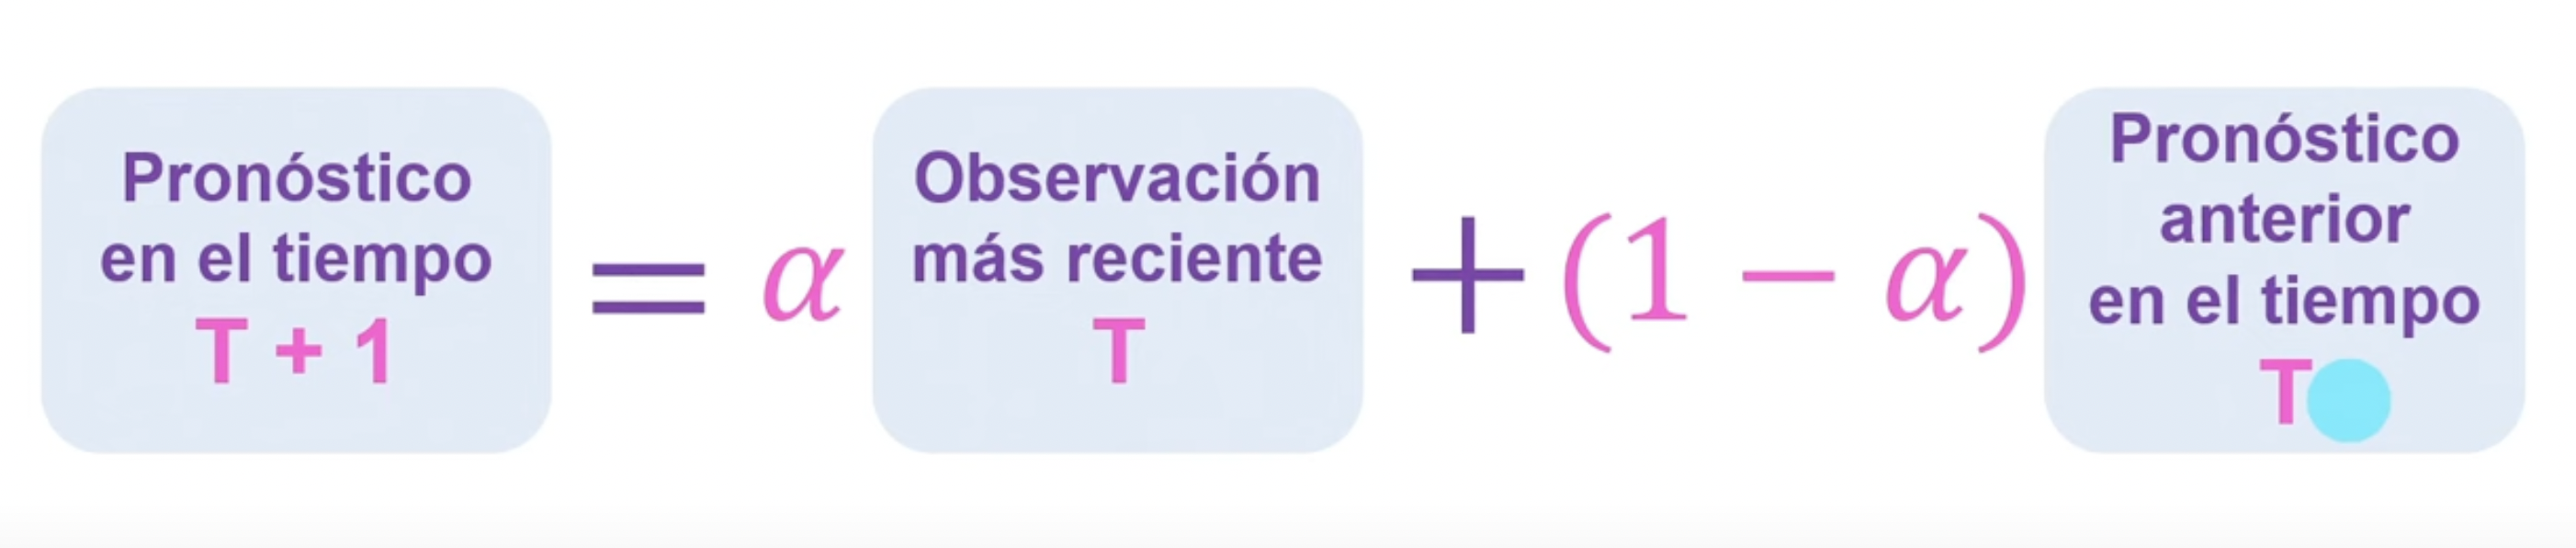

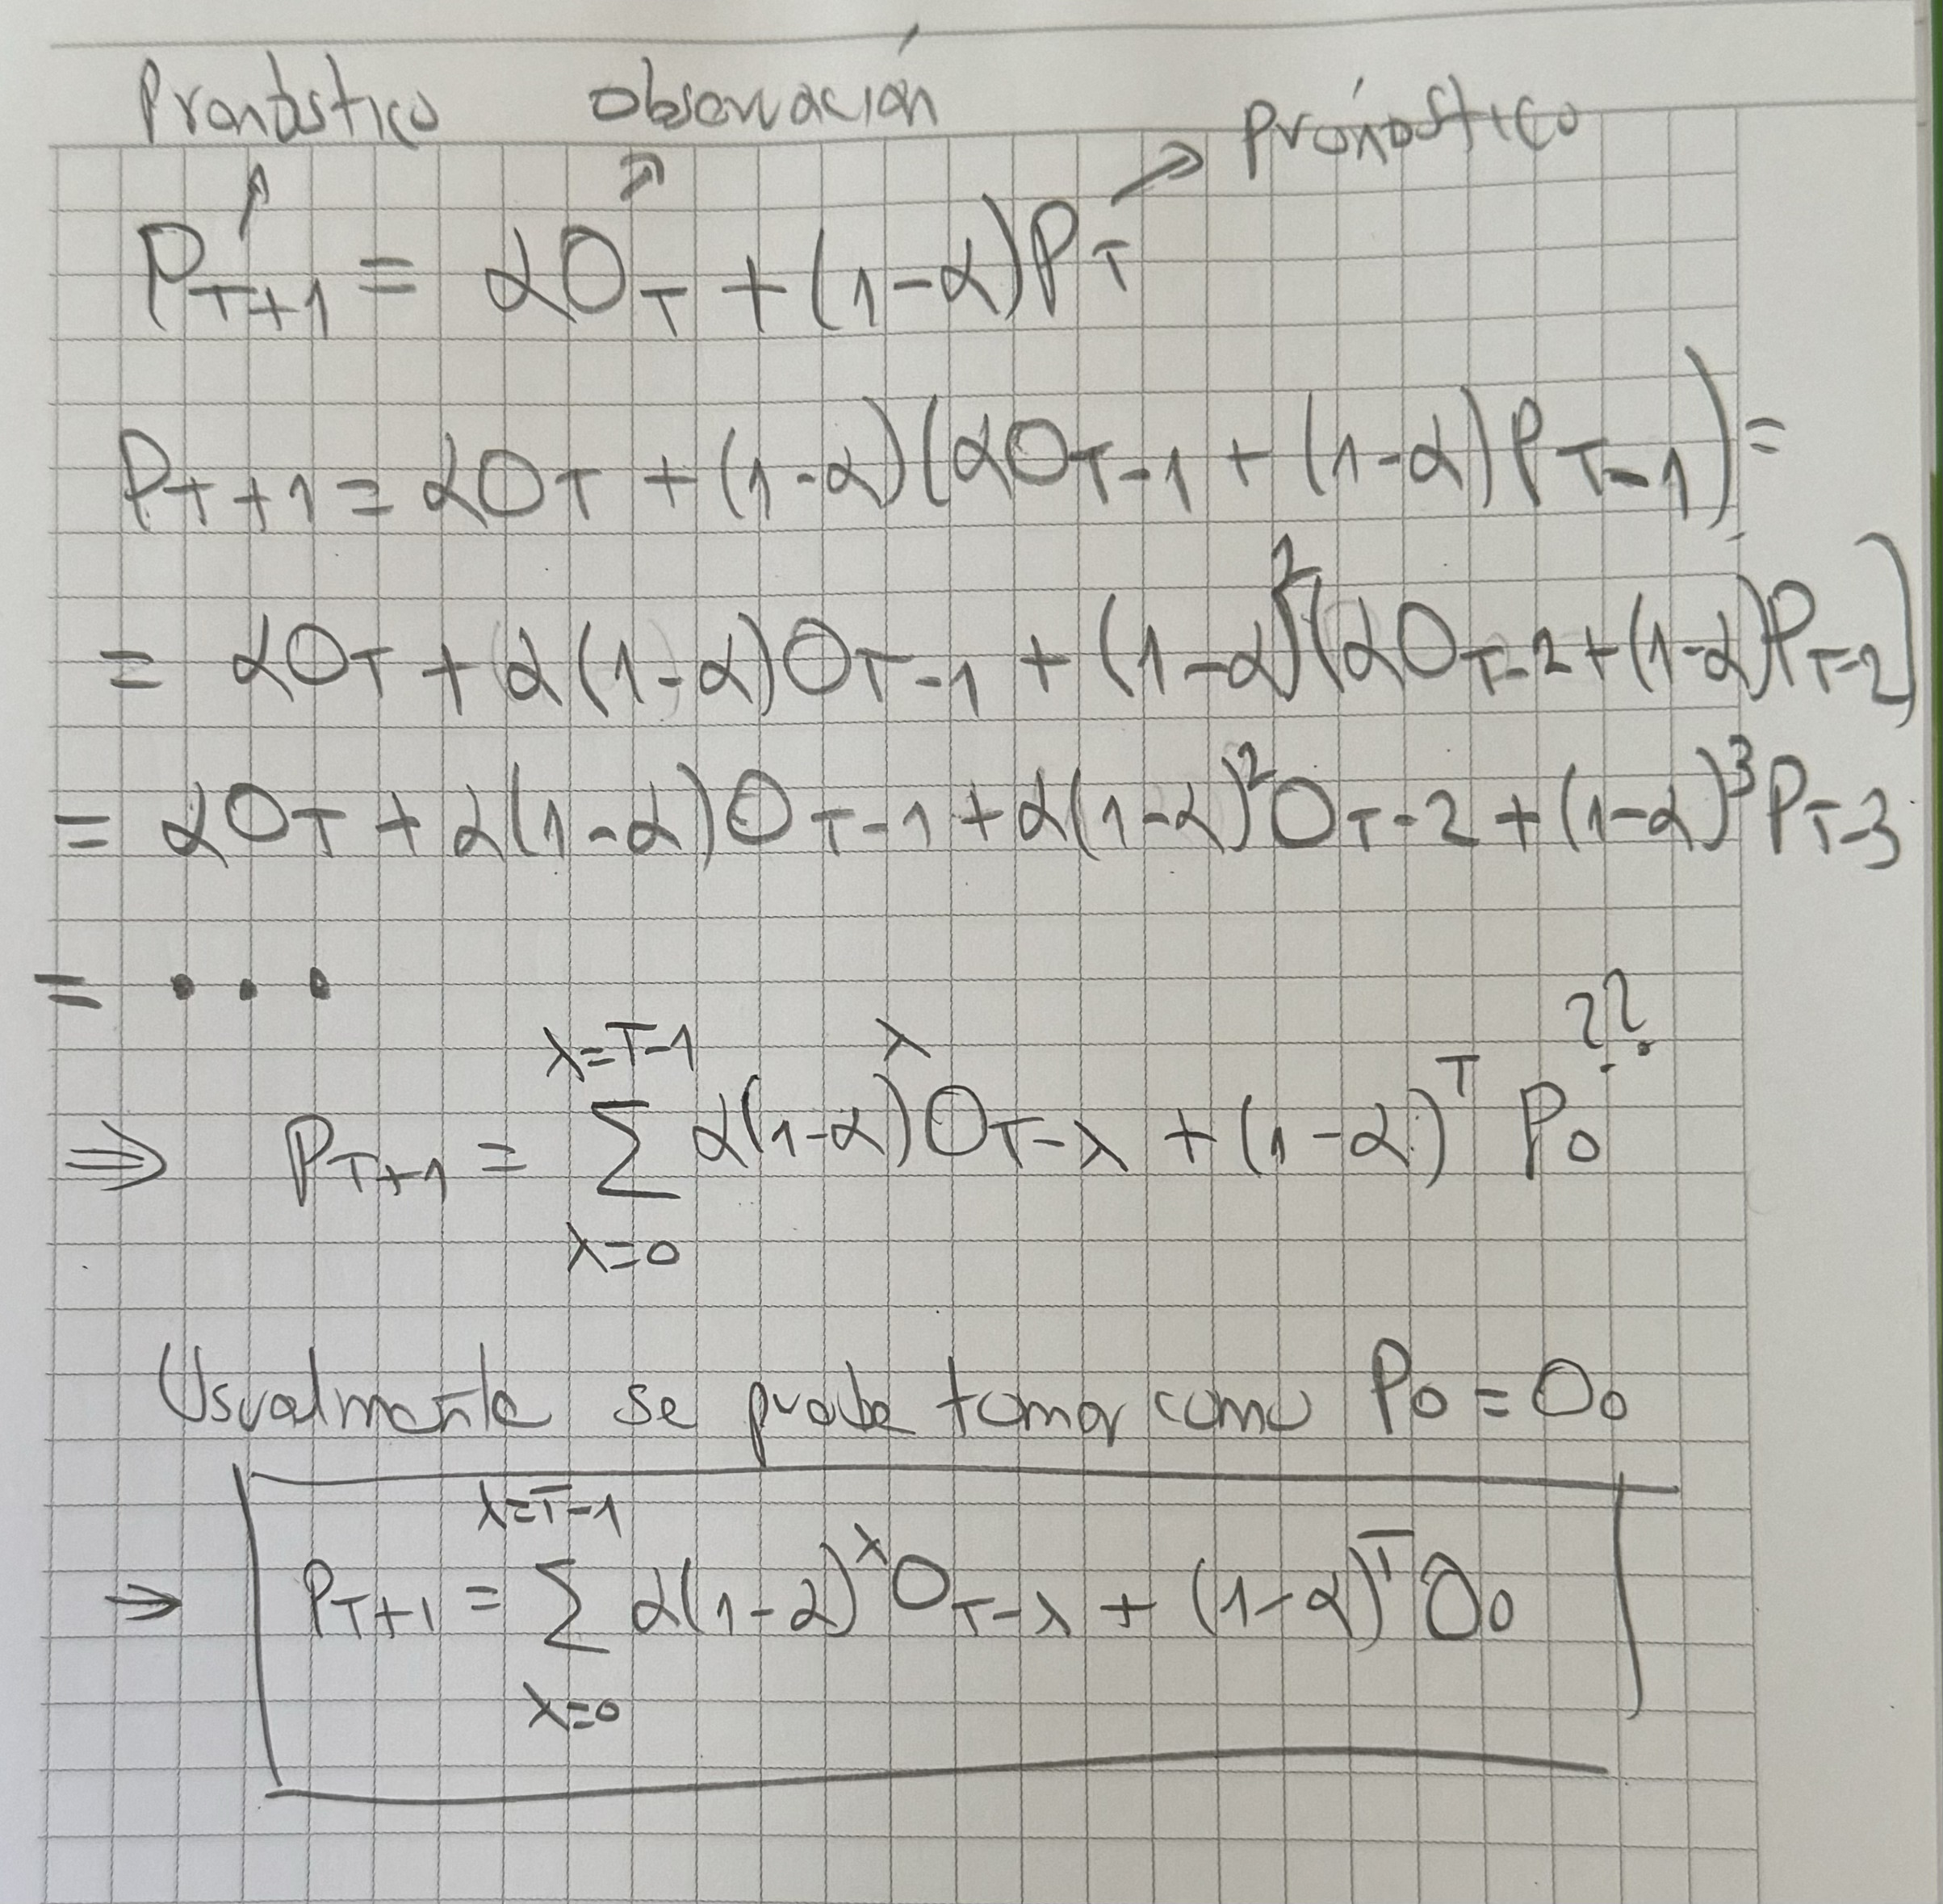

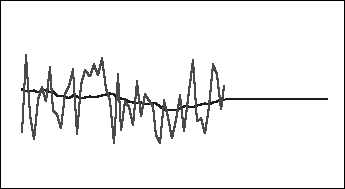

En Python implementamos este método usando statsmodels y la función SimpleExpSmoothing que ya viene con un algoritmo interno para optimizar y encontrar el valor de α, tal que minimice la suma de los cuadrados de los errores (MSE). Pero también se puede setear con los parámetros optimized=False y smoothing_level.

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

passengers = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month")
passengers.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
passengers.tail()

#Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

10
Alpha value: 0.995
Initial value: 112.0
First Forecast value: 431.7917809362986


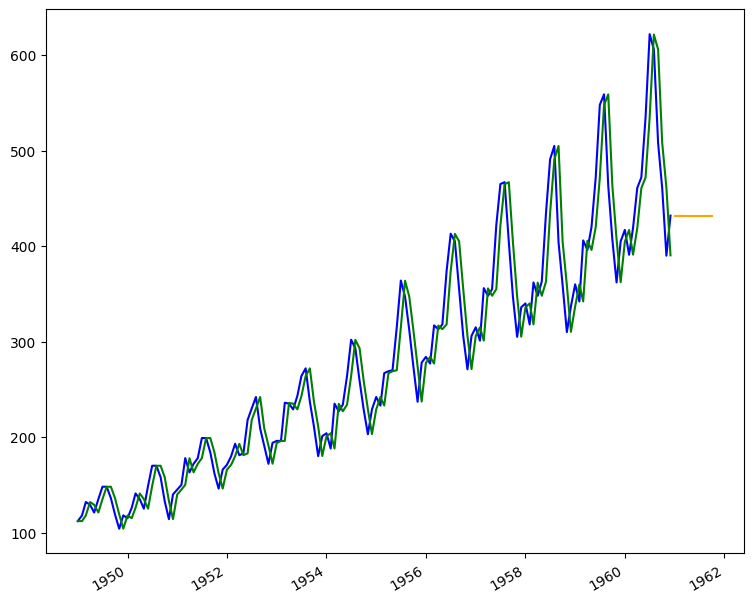

In [ ]:
import warnings

warnings.filterwarnings("ignore")

ses = SimpleExpSmoothing(passengers)
model = ses.fit()
forecast = model.forecast(10)
print(len(forecast))

print(f'Alpha value: {model.params["smoothing_level"]}')
print(f'Initial value: {model.params["initial_level"]}')
print(f"First Forecast value: {forecast[0]}")

fitted_values = model.fittedvalues

plt.figure(figsize=(9, 8))
plt.plot(passengers.index, passengers["#Passengers"], color="blue")
plt.plot(passengers.index, fitted_values, color="green")
forecast.plot(color="orange")
plt.show()

# 6.5.2. Suavizado exponencial Doble - Método de Holt
El método de Holt es una modificación del Suavizado Exponencial Simple, pero considerando un factor β que tenga en cuenta la tendencia de la serie de tiempo. Se implementa usando la función holt. Se usa principalmente cuando tenemos series de tiempo con una tendencia.

In [ ]:
from statsmodels.tsa.api import Holt

10
Alpha value: 0.995018689463307
Beta value: 0.003818912222562142
Initial value: 112.0
First Forecast value: 436.196219818579


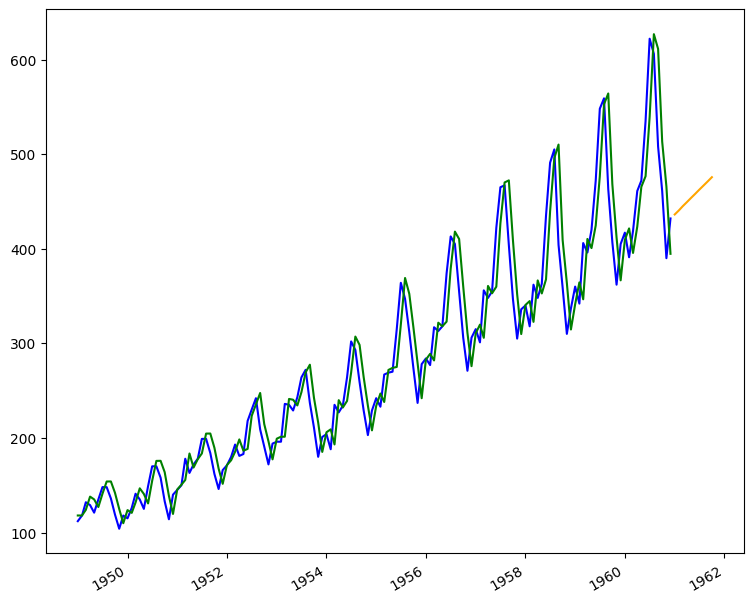

In [ ]:
import warnings

warnings.filterwarnings("ignore")

holt = Holt(passengers)
model = holt.fit()
forecast = model.forecast(10)
print(len(forecast))

print(f'Alpha value: {model.params["smoothing_level"]}')
print(f'Beta value: {model.params["smoothing_trend"]}')
print(f'Initial value: {model.params["initial_level"]}')
print(f"First Forecast value: {forecast[0]}")

fitted_values = model.fittedvalues

plt.figure(figsize=(9, 8))
plt.plot(passengers.index, passengers["#Passengers"], color="blue")
plt.plot(passengers.index, fitted_values, color="green")
forecast.plot(color="orange")
plt.show()

# 6.5.3. Suavizado Exponencial Triple - Holt Walters
Este método, aparte de considerar el término de tendencia, incorpora otro valor que tiene en cuenta la estacionalidad de la serie de tiempo, llevando así a pronósticos más precisos cuando tenemos series de tiempo con patrones de estacionalidad. Se implementa con la función ExponentialSmoothing.

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

10
Alpha value: 0.2918957602182923
Beta value: 2.46912172074771e-07
Seasonal value: 0.5679365551040281
Initial value: 115.44427376744214
First Forecast value: 450.6757614737614


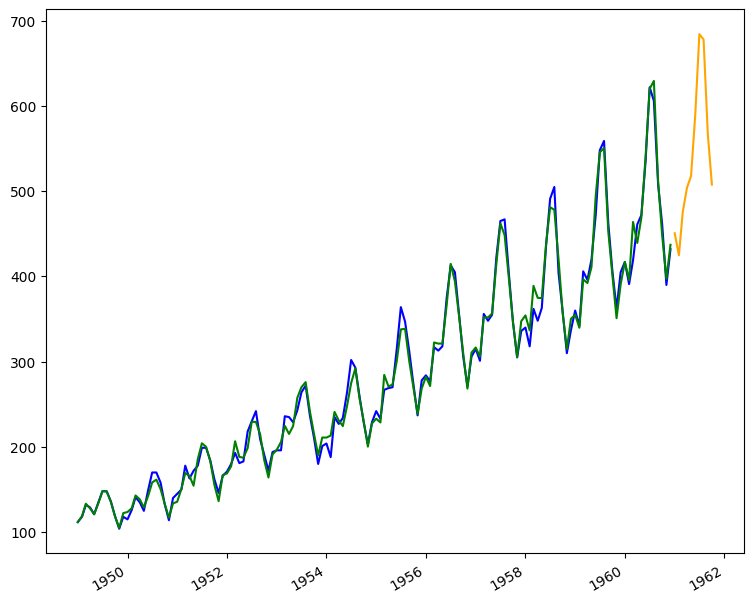

In [ ]:
import warnings

warnings.filterwarnings("ignore")

es = ExponentialSmoothing(passengers, seasonal_periods=12, trend="multiplicative", seasonal="multiplicative")
model = es.fit()
forecast = model.forecast(10)
print(len(forecast))

print(f'Alpha value: {model.params["smoothing_level"]}')
print(f'Beta value: {model.params["smoothing_trend"]}')
print(f'Seasonal value: {model.params["smoothing_seasonal"]}')
print(f'Initial value: {model.params["initial_level"]}')
print(f"First Forecast value: {forecast[0]}")

fitted_values = model.fittedvalues

plt.figure(figsize=(9, 8))
plt.plot(passengers.index, passengers["#Passengers"], color="blue")
plt.plot(passengers.index, fitted_values, color="green")
forecast.plot(color="orange")
plt.show()

In [ ]:
forecast

1961-01-01    450.675761
1961-02-01    424.819099
1961-03-01    475.496170
1961-04-01    504.076315
1961-05-01    517.872517
1961-06-01    590.146615
1961-07-01    684.227866
1961-08-01    678.031870
1961-09-01    567.112279
1961-10-01    507.823915
Freq: MS, dtype: float64